In [65]:
from readline import redisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from matplotlib.ticker import FuncFormatter
import numpy as np

# Set visualization styling
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.2)

# Function to format currency labels on charts
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create currency formatter
currency_format = FuncFormatter(currency_formatter)

# Load Data & Initial Data Exploration

In [66]:
# Load the dataset
df = pd.read_csv('/Users/mina.rezaei/Desktop/Repository/ecommerce-profit/ecommerc-dataset/E-commerce Dataset.csv')
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [67]:
# Check the dataset shape
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Check data types and missing values
print("\nData Information:")
display(df.info())

# Check for missing values
print("\nMissing Values Count:")
display(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Dataset Shape: 51290 rows and 16 columns

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       5128

None


Missing Values Count:


Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64


Summary Statistics:


,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [68]:
# Data Type Handling
# Convert numerical columns to float or integer (coerce invalids to NaN)
numerical_columns = ['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping_Cost']
for col in numerical_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Numerical column '{col}' not found in DataFrame.")

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [69]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    # Remove duplicates if they exist
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")


Number of duplicate rows: 0


In [70]:
# Create 'Date' column by combining Order_Date and Time
if 'Order_Date' in df.columns and 'Time' in df.columns:
    df['Date'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
else:
    print("Warning: 'Order_Date' or 'Time' column not found. Skipping Date conversion.")

# Convert Customer_Id to object (string)
if 'Customer_Id' in df.columns:
    df['Customer_Id'] = df['Customer_Id'].astype('object')
else:
    print("Warning: 'Customer_Id' column not found.")

# Convert categorical columns to 'category' dtype
categorical_columns = [
    'Gender',
    'Device_Type',
    'Customer_Login_type',
    'Product_Category',
    'Order_Priority',
    'Payment_method'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Warning: Categorical column '{col}' not found in DataFrame.")

In [71]:
# Feature Engineering: Extract Month and Quarter, and calculate Profit Margin
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.quarter

# Calculate profit margin if not already available
if 'Profit' in df.columns and 'Sales' in df.columns:
    df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

In [72]:
# Check profitability overview
print("\nOverall Profit Metrics:")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Average Profit Margin: {df['Profit Margin'].mean():.2f}%")


Overall Profit Metrics:
Total Sales: $7,813,411.00
Total Profit: $3,611,186.60
Average Profit Margin: 42.53%


# Profit Analysis by Product_Category

In [73]:
# 1. Profit by Product_Category

if 'Product_Category' in df.columns:
    category_profit = df.groupby('Product_Category', observed=True).agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum',
        'Order_Date': 'nunique'  # Count unique order dates as proxy for orders
    }).sort_values('Profit', ascending=False)

    print("\nProfit by Product Category:")
    print(category_profit)


Profit by Product Category:
                        Sales     Profit  Quantity  Order_Date
Product_Category                                              
Fashion             4345914.0  2072623.9   66639.0         356
Home & Furniture    1975831.0   880058.9   38190.0         356
Auto & Accessories  1096928.0   484313.2   17593.0         356
Electronic           394738.0   174190.6    5951.0         356


In [74]:

    # Calculate additional metrics for deeper analysis
    category_profit['Profit Margin'] = (category_profit['Profit'] / category_profit['Sales']) * 100
    category_profit['Avg Sales per Item'] = category_profit['Sales'] / category_profit['Quantity']
    category_profit['Avg Profit per Item'] = category_profit['Profit'] / category_profit['Quantity']
    category_profit['Sales Contribution (%)'] = (category_profit['Sales'] / category_profit['Sales'].sum()) * 100
    category_profit['Profit Contribution (%)'] = (category_profit['Profit'] / category_profit['Profit'].sum()) * 100
    
    print("\nProfit by Product_Category:")
    print(category_profit)


Profit by Product_Category:
                        Sales     Profit  Quantity  Order_Date  Profit Margin  \
Product_Category                                                                
Fashion             4345914.0  2072623.9   66639.0         356      47.691323   
Home & Furniture    1975831.0   880058.9   38190.0         356      44.541203   
Auto & Accessories  1096928.0   484313.2   17593.0         356      44.151777   
Electronic           394738.0   174190.6    5951.0         356      44.128156   

                    Avg Sales per Item  Avg Profit per Item  \
Product_Category                                              
Fashion                      65.215775            31.102266   
Home & Furniture             51.736868            23.044224   
Auto & Accessories           62.350253            27.528744   
Electronic                   66.331373            29.270812   

                    Sales Contribution (%)  Profit Contribution (%)  
Product_Category                   

In [75]:
# Create a comprehensive summary table with all metrics
summary_metrics = category_profit[['Sales', 'Profit', 'Quantity', 'Profit Margin', 
                                  'Avg Sales per Item', 'Avg Profit per Item',
                                  'Sales Contribution (%)', 'Profit Contribution (%)']]
# Format for better readability
summary_formatted = pd.DataFrame({
    'Total Sales': summary_metrics['Sales'].map('${:,.2f}'.format),
    'Total Profit': summary_metrics['Profit'].map('${:,.2f}'.format),
    'Units Sold': summary_metrics['Quantity'].map('{:,.0f}'.format),
    'Profit Margin': summary_metrics['Profit Margin'].map('{:.2f}%'.format),
    'Avg Sale/Item': summary_metrics['Avg Sales per Item'].map('${:,.2f}'.format),
    'Avg Profit/Item': summary_metrics['Avg Profit per Item'].map('${:,.2f}'.format),
    'Sales Share': summary_metrics['Sales Contribution (%)'].map('{:.2f}%'.format),
    'Profit Share': summary_metrics['Profit Contribution (%)'].map('{:.2f}%'.format)
})

print("\nComprehensive Category Analysis:")
print(summary_formatted)


Comprehensive Category Analysis:
                      Total Sales   Total Profit Units Sold Profit Margin  \
Product_Category                                                            
Fashion             $4,345,914.00  $2,072,623.90     66,639        47.69%   
Home & Furniture    $1,975,831.00    $880,058.90     38,190        44.54%   
Auto & Accessories  $1,096,928.00    $484,313.20     17,593        44.15%   
Electronic            $394,738.00    $174,190.60      5,951        44.13%   

                   Avg Sale/Item Avg Profit/Item Sales Share Profit Share  
Product_Category                                                           
Fashion                   $65.22          $31.10      55.62%       57.39%  
Home & Furniture          $51.74          $23.04      25.29%       24.37%  
Auto & Accessories        $62.35          $27.53      14.04%       13.41%  
Electronic                $66.33          $29.27       5.05%        4.82%  


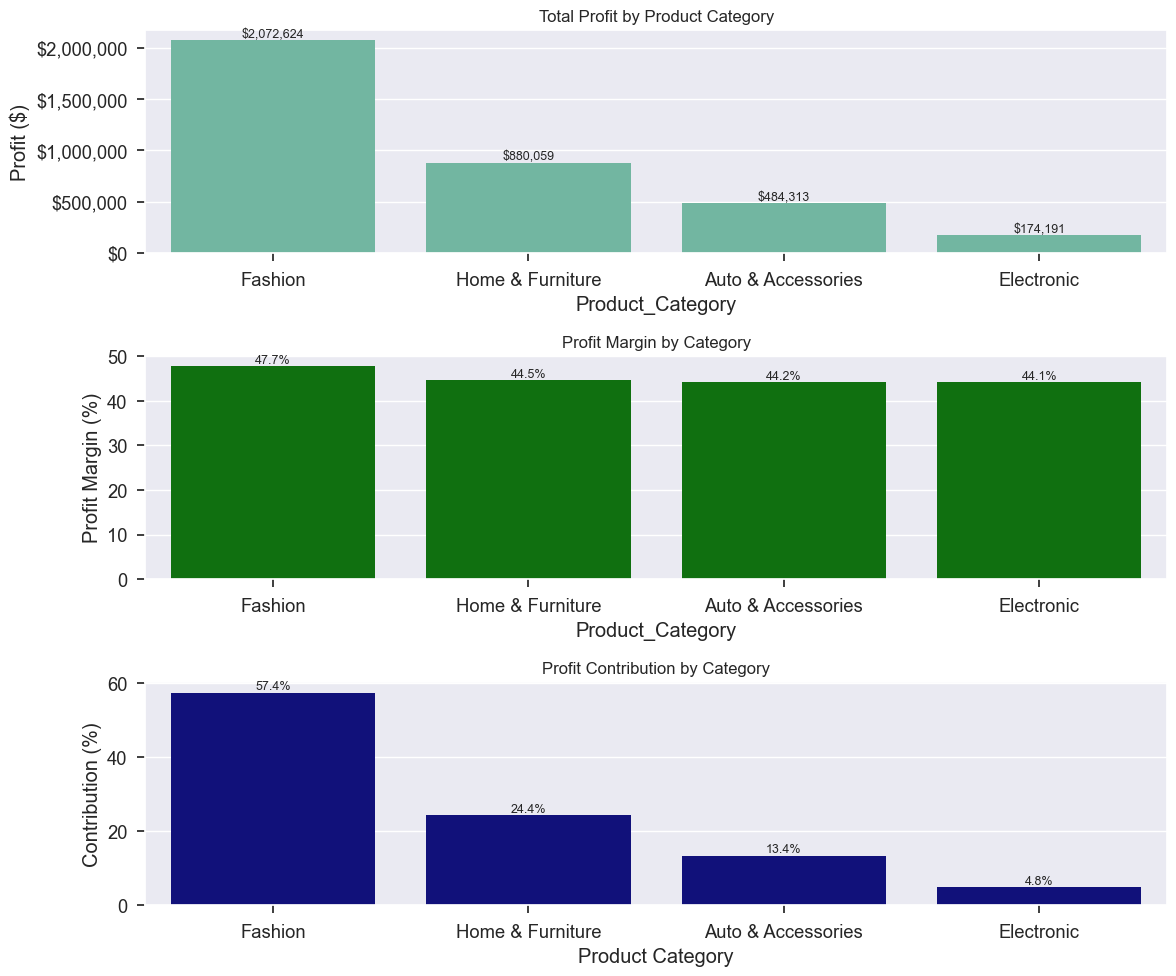

In [76]:

# Visualization - Total Profit, Profit Margin, and Profit Contribution by Product_Category
# Sort category_profit by Profit in descending order
category_profit_sorted = category_profit.sort_values('Profit', ascending=False)

# Create all category visualizations in a concise way
plt.figure(figsize=(12, 10))

# 1. Total Profit by Category (top)
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x=category_profit_sorted.index, y=category_profit_sorted['Profit'], order=category_profit_sorted.index)
ax1.yaxis.set_major_formatter(currency_format)
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'${category_profit_sorted["Profit"].iloc[i]:,.0f}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.title('Total Profit by Product Category', fontsize=12)
plt.ylabel('Profit ($)')

# 2. Profit Margin by Category (middle)
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x=category_profit_sorted.index, y=category_profit_sorted['Profit Margin'], color='green', order=category_profit_sorted.index)
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{category_profit_sorted["Profit Margin"].iloc[i]:.1f}%', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.title('Profit Margin by Category', fontsize=12)
plt.ylabel('Profit Margin (%)')

# 3. Contribution Comparison (bottom)
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x=category_profit_sorted.index, y=category_profit_sorted['Profit Contribution (%)'], color='darkblue', order=category_profit_sorted.index)
for i, p in enumerate(ax3.patches):
    ax3.annotate(f'{category_profit_sorted["Profit Contribution (%)"].iloc[i]:.1f}%', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.title('Profit Contribution by Category', fontsize=12)
plt.xlabel('Product Category')
plt.ylabel('Contribution (%)')

plt.tight_layout()
plt.savefig('category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Profit by Product (Top 10):
   Product_Category    Profit  Profit_Margin  Profit_Contribution (%)
0           Fashion  340720.6      58.913953                 9.435142
1           Fashion  296718.2      55.829928                 8.216640
2           Fashion  289097.6      55.367408                 8.005612
3           Fashion  276856.3      54.458963                 7.666630
4           Fashion  265350.7      53.443927                 7.348020
5           Fashion  230078.3      50.337430                 6.371266
6  Home & Furniture  196828.2      56.020868                 5.450513
7  Home & Furniture  178920.5      53.822979                 4.954618
8  Home & Furniture  172262.9      52.979354                 4.770258
9           Fashion  151271.7      40.797356                 4.188975


/var/folders/8v/l8pr3lb93wz844784db6rx7c0000gp/T/ipykernel_70913/1098600605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Product', y='Profit', data=top_products, palette=colors)


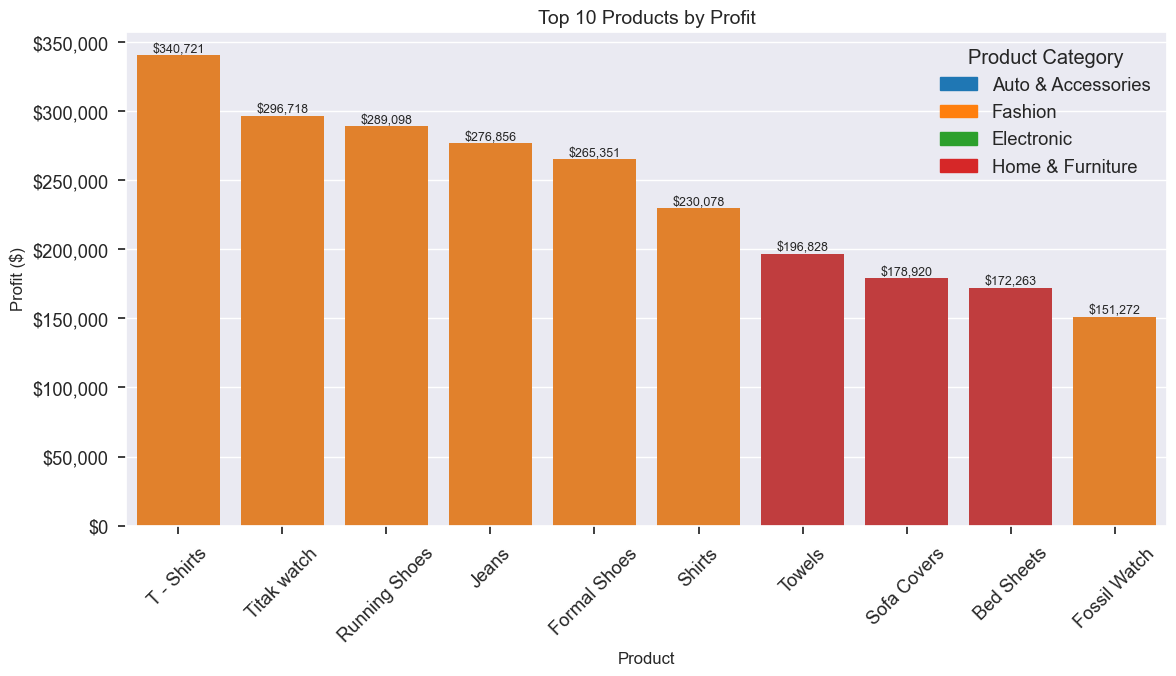


Top Products within Fashion (Sorted by Profit):
      Profit  Profit_Margin  Profit_Contribution (%)
0   340720.6      58.913953                 9.435142
1   296718.2      55.829928                 8.216640
2   289097.6      55.367408                 8.005612
3   276856.3      54.458963                 7.666630
4   265350.7      53.443927                 7.348020
5   230078.3      50.337430                 6.371266
9   151271.7      40.797356                 4.188975
13   71894.5      25.280960                 1.990883
14   66820.7      46.235660                 1.850381
20   44831.3      17.637064                 1.241456


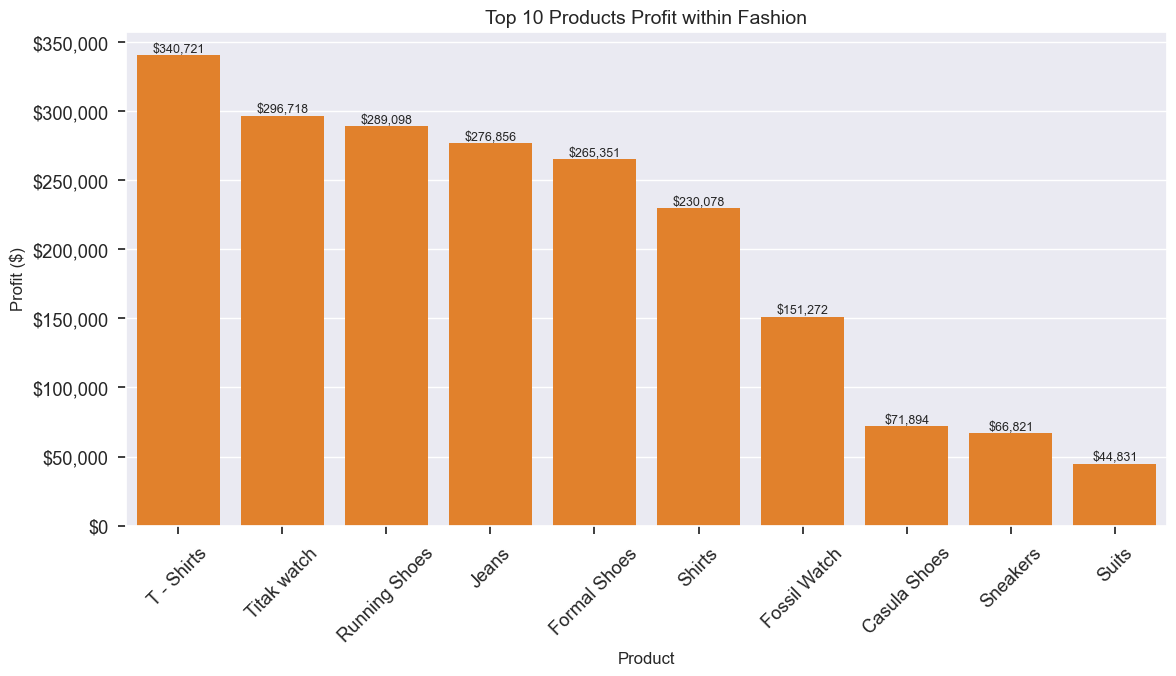

In [77]:
# ## 3. Profit Analysis by Product

if 'Product' in df.columns:
    # Group by product
    product_profit = df.groupby(['Product', 'Product_Category'], observed=True).agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum',
        'Order_Date': 'nunique'
    }).sort_values('Profit', ascending=False)
    
    # Calculate additional metrics
    product_profit['Profit_Margin'] = (product_profit['Profit'] / product_profit['Sales']) * 100
    product_profit['Avg_Sales_per_Item'] = product_profit['Sales'] / product_profit['Quantity']
    product_profit['Avg_Profit_per_Item'] = product_profit['Profit'] / product_profit['Quantity']
    product_profit['Profit_Contribution (%)'] = (product_profit['Profit'] / product_profit['Profit'].sum()) * 100
    
    # Reset index to make 'Product' and 'Product_Category' accessible as columns
    product_profit = product_profit.reset_index()
    
    print("\nProfit by Product (Top 10):")
    print(product_profit.head(10)[['Product_Category', 'Profit', 'Profit_Margin', 'Profit_Contribution (%)']])
    
    # Visualization - Top 10 Products by Profit
    plt.figure(figsize=(12, 7))
    top_products = product_profit.head(10)
    
    # Create color map based on parent category
    category_colors = {cat: plt.cm.tab10(i) for i, cat in enumerate(df['Product_Category'].unique())}
    colors = [category_colors.get(cat, 'gray') for cat in top_products['Product_Category']]
    
    # Create bar chart
    ax = sns.barplot(x='Product', y='Profit', data=top_products, palette=colors)
    ax.yaxis.set_major_formatter(currency_format)
    
    # Add value labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'${top_products["Profit"].iloc[i]:,.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=9)
    
    # Add parent category labels to the legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in category_colors.values()]
    labels = category_colors.keys()
    plt.legend(handles, labels, title='Product Category')
    
    plt.title('Top 10 Products by Profit', fontsize=14)
    plt.xlabel('Product', fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_products_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analysis of products within top category
    top_category = category_profit.index[0]  # assuming this variable exists
    top_cat_products = product_profit[product_profit['Product_Category'] == top_category].sort_values('Profit', ascending=False)
    
    print(f"\nTop Products within {top_category} (Sorted by Profit):")
    print(top_cat_products.head(10)[['Profit', 'Profit_Margin', 'Profit_Contribution (%)']])
    
    # Visualization - Products within top category
    plt.figure(figsize=(12, 7))
    top_cat_products_plot = top_cat_products.head(10)
    ax = sns.barplot(x='Product', y='Profit', data=top_cat_products_plot, 
                   color=category_colors.get(top_category, 'blue'))
    ax.yaxis.set_major_formatter(currency_format)
    
    # Add value labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'${top_cat_products_plot["Profit"].iloc[i]:,.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=9)
    
    plt.title(f'Top 10 Products Profit within {top_category}', fontsize=14)
    plt.xlabel('Product', fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{top_category.lower()}_products.png', dpi=300, bbox_inches='tight')
    plt.show()



Profit by Gender:
            Sales     Profit  Quantity  Customer_Id  Profit_Margin  \
Gender                                                               
Female  3504493.0  1620404.9   59056.0        19924      46.237927   
Male    4308918.0  1990781.7   69317.0        24098      46.201429   

        Profit_Contribution  
Gender                       
Female            44.871813  
Male              55.128187  


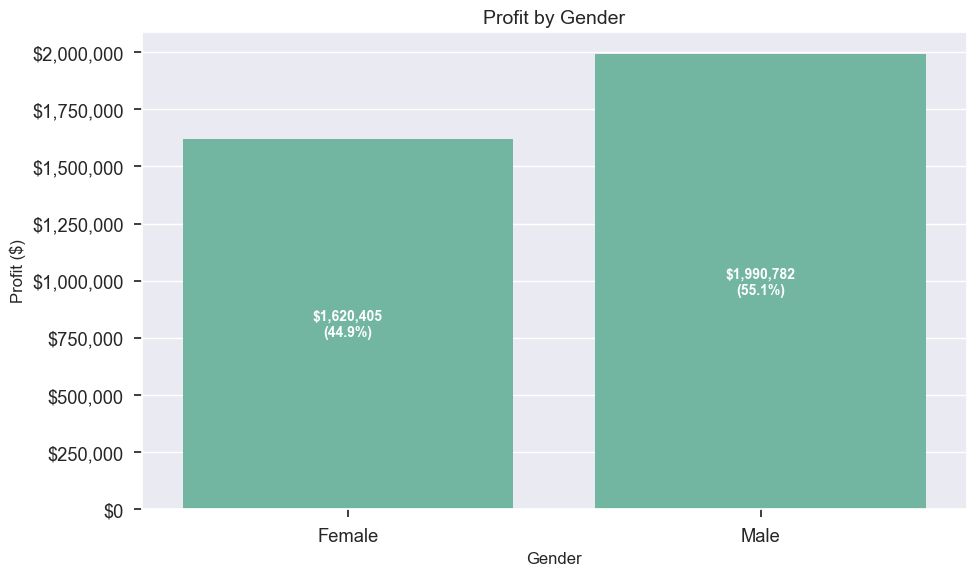


Profit by Device_Type:
                 Sales     Profit  Quantity  Customer_Id  Profit_Margin  \
Device_Type                                                               
Mobile        563340.0   262289.7    8546.0         3557      46.559751   
Web          7250071.0  3348896.9  119827.0        36950      46.191229   

             Profit_Contribution  
Device_Type                       
Mobile                  7.263255  
Web                    92.736745  


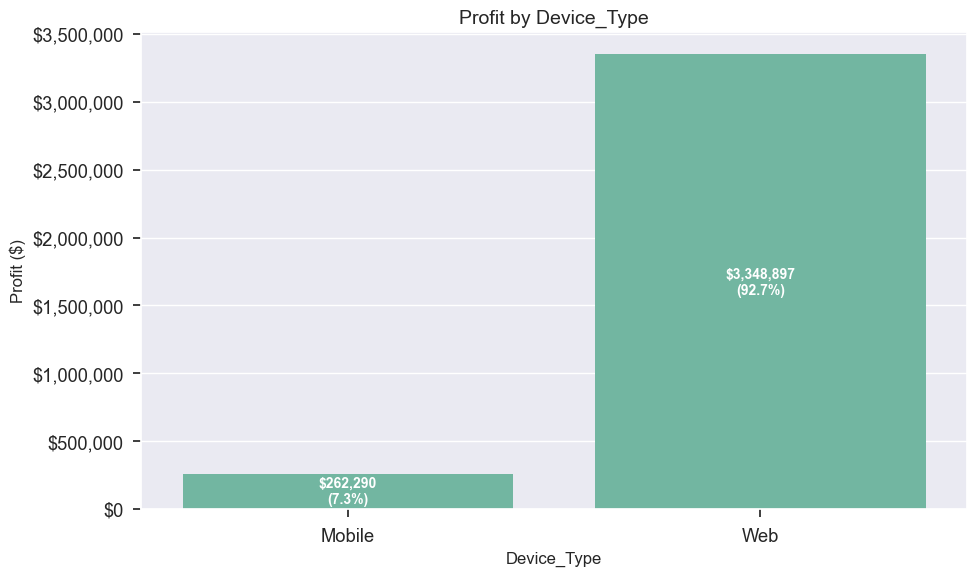

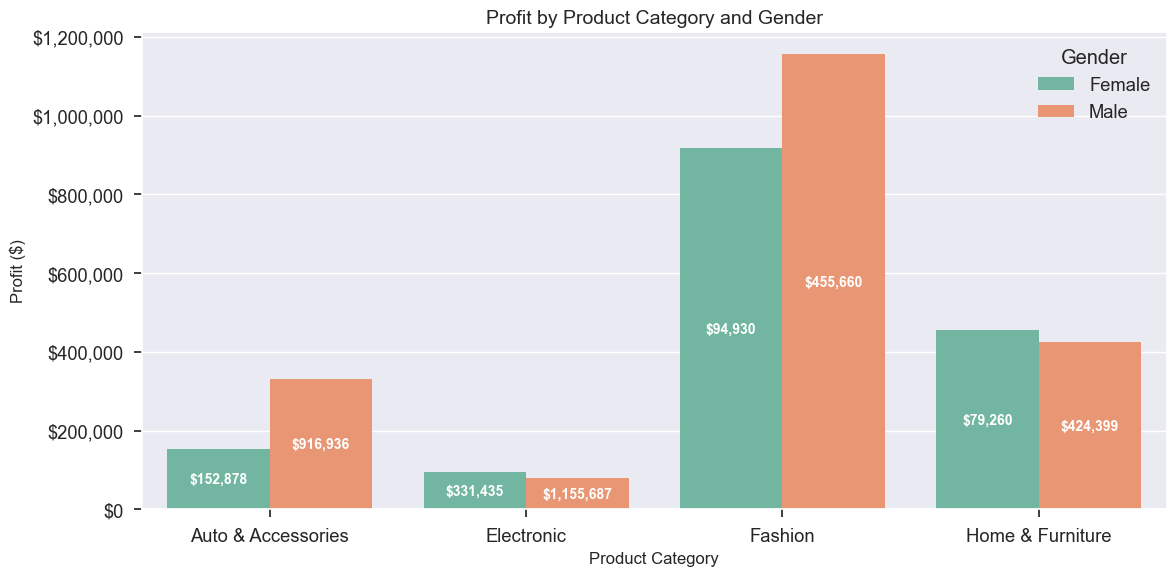

In [ ]:
# Customer Segment Analysis
# Main segment analysis function
def analyze_segment(column, title_prefix, filename_prefix):
    # Aggregate metrics
    segment_data = df.groupby(column, observed=True).agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum',
        'Customer_Id': 'nunique'
    })

    # Derived metrics
    segment_data['Profit_Margin'] = (segment_data['Profit'] / segment_data['Sales']) * 100
    segment_data['Profit_Contribution'] = (segment_data['Profit'] / segment_data['Profit'].sum()) * 100

    # Print results
    print(f"\nProfit by {column}:")
    print(segment_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=segment_data.index, y=segment_data['Profit'])
    ax.yaxis.set_major_formatter(currency_format)

    for bar, (_, row) in zip(ax.patches, segment_data.iterrows()):
        ax.annotate(f'${row["Profit"]:,.0f}\n({row["Profit_Contribution"]:.1f}%)',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

    plt.title(f'{title_prefix} {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{filename_prefix}_{column.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return segment_data


# Run segment analysis
gender_profit = analyze_segment('Gender', 'Profit by', 'profit_by')
device_profit = analyze_segment('Device_Type', 'Profit by', 'profit_by')


# Gender & Product Category Breakdown
if 'Gender' in df.columns:
    plt.figure(figsize=(12, 6))
    gender_category = df.groupby(['Gender', 'Product_Category'], observed=True)['Profit'].sum().reset_index()

    ax = sns.barplot(x='Product_Category', y='Profit', hue='Gender', data=gender_category)
    ax.yaxis.set_major_formatter(currency_format)

    # Sort to match bar order
    sorted_data = gender_category.sort_values(['Product_Category', 'Gender']).reset_index(drop=True)

    for bar, (_, row) in zip(ax.patches, sorted_data.iterrows()):
        ax.annotate(f'${row["Profit"]:,.0f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

    plt.title('Profit by Product Category and Gender', fontsize=14)
    plt.xlabel('Product Category', fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.savefig('gender_category_profit.png', dpi=300, bbox_inches='tight')
    plt.show()



Monthly Profit Analysis:
   Month_Name    Profit  Profit_Margin
0     January  174573.6      45.985560
1    February  153288.2      46.102408
2       March  200936.8      46.139122
3       April  277832.2      46.513748
4         May  379386.3      46.013994
5        June  298300.1      46.424057
6        July  374391.6      46.209490
7      August  306904.0      46.186051
8   September  341558.1      46.262591
9     October  342368.5      46.055218
10   November  406808.7      46.339846
11   December  354838.5      46.254303


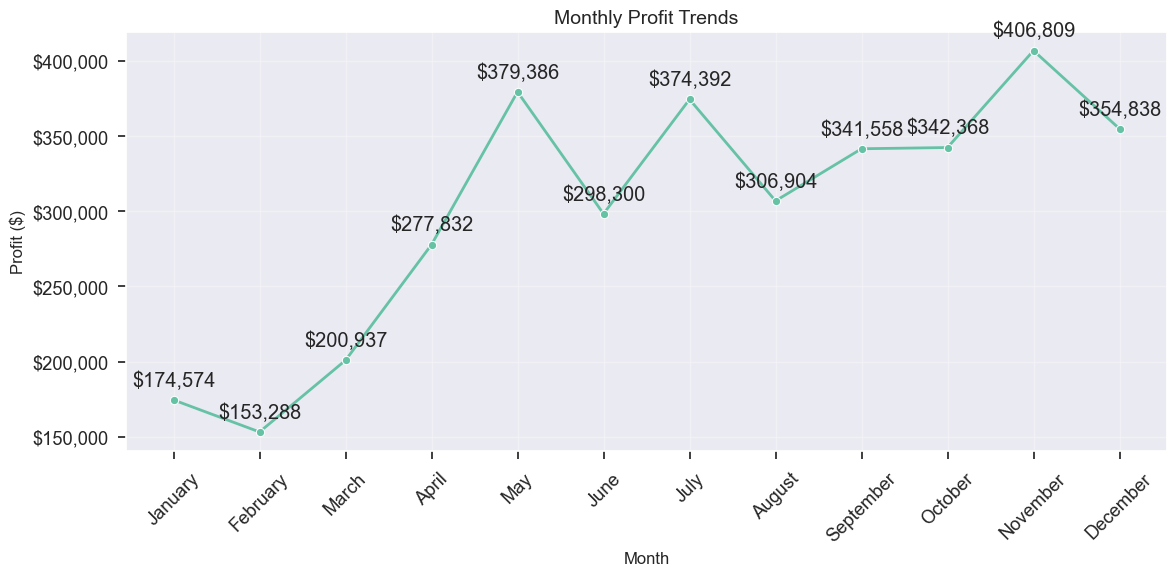


Top 3 Most Profitable Months:
   Month_Name    Profit  Profit_Margin
10   November  406808.7      46.339846
4         May  379386.3      46.013994
6        July  374391.6      46.209490


In [79]:
# Temporal Analysis
# Create Month_Name from existing Month column
if 'Month' in df.columns and 'Month_Name' not in df.columns:
    # Create a dictionary mapping month numbers to month names
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 
        5: 'May', 6: 'June', 7: 'July', 8: 'August', 
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    # Create Month_Name column
    df['Month_Name'] = df['Month'].map(month_names)

# Now perform the monthly analysis
monthly_profit = df.groupby('Month').agg({
    'Sales': 'sum', 
    'Profit': 'sum', 
    'Quantity': 'sum'
}).reset_index()

# Add Month_Name to the results
monthly_profit['Month_Name'] = monthly_profit['Month'].map(month_names)

# Add calculated metrics and sort chronologically
monthly_profit['Profit_Margin'] = (monthly_profit['Profit'] / monthly_profit['Sales']) * 100
monthly_profit = monthly_profit.sort_values('Month')

print("\nMonthly Profit Analysis:")
print(monthly_profit[['Month_Name', 'Profit', 'Profit_Margin']])

# Create monthly trend visualization
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Month_Name', y='Profit', data=monthly_profit, marker='o', linewidth=2)
ax.yaxis.set_major_formatter(currency_format)

# Add value labels
for i, point in enumerate(monthly_profit['Profit']):
    ax.annotate(f'${point:,.0f}', 
               (i, point), 
               textcoords="offset points",
               xytext=(0,10),
               ha='center')

plt.title('Monthly Profit Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_profit_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify top months
top_months = monthly_profit.sort_values('Profit', ascending=False).head(3)
print("\nTop 3 Most Profitable Months:")
print(top_months[['Month_Name', 'Profit', 'Profit_Margin']])


Profit by Payment Method:
                    Sales     Profit  Quantity  Customer_Id  Profit_Margin  \
Payment_method                                                               
credit_card     5819379.0  2692916.4   95387.0        31055      46.274979   
money_order     1461269.0   672978.4   24173.0         9089      46.054381   
e_wallet         422750.0   194710.3    7009.0         2746      46.058025   
debit_card       109979.0    50573.0    1800.0          733      45.984233   
not_defined          34.0        8.5       4.0            1      25.000000   

                Profit_Contribution  
Payment_method                       
credit_card               74.571511  
money_order               18.635935  
e_wallet                   5.391865  
debit_card                 1.400454  
not_defined                0.000235  


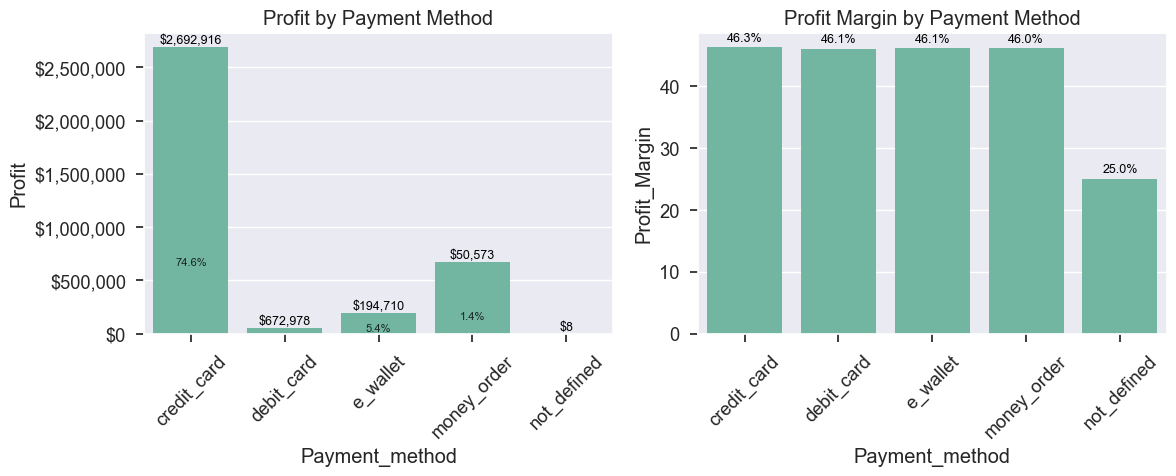

In [80]:
# Payment Method Analysis with elegant labels
if 'Payment_method' in df.columns:
    # One-step aggregation and metric calculation
    payment_profit = df.groupby('Payment_method', observed=True).agg({
        'Sales': 'sum', 'Profit': 'sum', 
        'Quantity': 'sum', 'Customer_Id': 'nunique'
    }).sort_values('Profit', ascending=False)
    
    payment_profit['Profit_Margin'] = (payment_profit['Profit'] / payment_profit['Sales']) * 100
    payment_profit['Profit_Contribution'] = (payment_profit['Profit'] / payment_profit['Profit'].sum()) * 100
    
    print("\nProfit by Payment Method:")
    print(payment_profit)
    
    # Create single visualization with both metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Profit by payment method
    bars = sns.barplot(x=payment_profit.index, y=payment_profit['Profit'], ax=ax1)
    ax1.yaxis.set_major_formatter(currency_format)
    
    # More elegant, simpler labels
    for i, p in enumerate(ax1.patches):
        # Place profit amount on top of the bar
        ax1.annotate(f'${payment_profit["Profit"].iloc[i]:,.0f}', 
                    (p.get_x() + p.get_width()/2, p.get_height() + 5000),
                    ha='center', va='bottom', color='black', fontsize=9)
        
        # Place percentage inside the bar, only if bar is tall enough
        if p.get_height() > 100000:  # Only add % for taller bars
            ax1.annotate(f'{payment_profit["Profit_Contribution"].iloc[i]:.1f}%', 
                        (p.get_x() + p.get_width()/2, p.get_height()/4),
                        ha='center', va='center', color='black', fontsize=8,
                        alpha=0.8)
    
    ax1.set_title('Profit by Payment Method')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Profit margin by payment method
    sns.barplot(x=payment_profit.index, y=payment_profit['Profit_Margin'], ax=ax2)
    for i, p in enumerate(ax2.patches):
        ax2.annotate(f'{payment_profit["Profit_Margin"].iloc[i]:.1f}%', 
                    (p.get_x() + p.get_width()/2, p.get_height() + 0.5),
                    ha='center', va='bottom', color='black', fontsize=9)
    
    ax2.set_title('Profit Margin by Payment Method')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('payment_method_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

/var/folders/8v/l8pr3lb93wz844784db6rx7c0000gp/T/ipykernel_70913/2283635703.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,


<Figure size 1000x600 with 0 Axes>

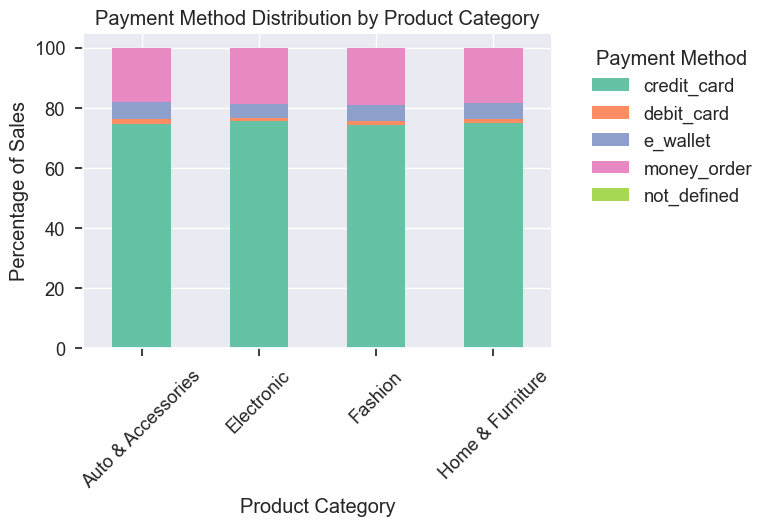


Payment Methods for Fashion Category:
  credit_card: 74.3% of category profit
  debit_card: 1.5% of category profit
  e_wallet: 5.4% of category profit
  money_order: 18.9% of category profit
  not_defined: 0.0% of category profit


/var/folders/8v/l8pr3lb93wz844784db6rx7c0000gp/T/ipykernel_70913/2283635703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_category = df.groupby('Product_Category')['Profit'].sum().idxmax()
/var/folders/8v/l8pr3lb93wz844784db6rx7c0000gp/T/ipykernel_70913/2283635703.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cat_payments = df[df['Product_Category'] == top_category].groupby('Payment_method')['Profit'].sum()


In [81]:
# Simplified Payment Method by Category Analysis
if 'Payment_method' in df.columns and 'Product_Category' in df.columns:
    # Create pivot table of payment methods and categories
    pivot = pd.pivot_table(df, 
                        values='Sales', 
                        index='Product_Category',
                        columns='Payment_method', 
                        aggfunc='sum')
    
    # Convert to percentages by row
    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100
    
    # Visualize
    plt.figure(figsize=(10, 6))
    pivot_pct.plot(kind='bar', stacked=True)
    plt.title('Payment Method Distribution by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Percentage of Sales')
    plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('payment_category_distribution.png', dpi=300)
    plt.show()
    
    # Check top category's payment breakdown
    top_category = df.groupby('Product_Category')['Profit'].sum().idxmax()
    top_cat_payments = df[df['Product_Category'] == top_category].groupby('Payment_method')['Profit'].sum()
    top_cat_pct = (top_cat_payments / top_cat_payments.sum() * 100).round(1)
    
    print(f"\nPayment Methods for {top_category} Category:")
    for method, pct in top_cat_pct.items():
        print(f"  {method}: {pct}% of category profit")


Discount Level Analysis:
                  Sales    Profit  Quantity  Profit_Margin
Discount_Bin                                              
0-10%         1111050.0  556010.3   17001.0      50.043679
11-20%        1767005.0  836558.8   30553.0      47.343318
21-30%        1827323.0  816040.8   31863.0      44.657721
31-40%        1603246.0  728805.7   26084.0      45.458133
41-50%        1504537.0  673638.5   22867.0      44.773807


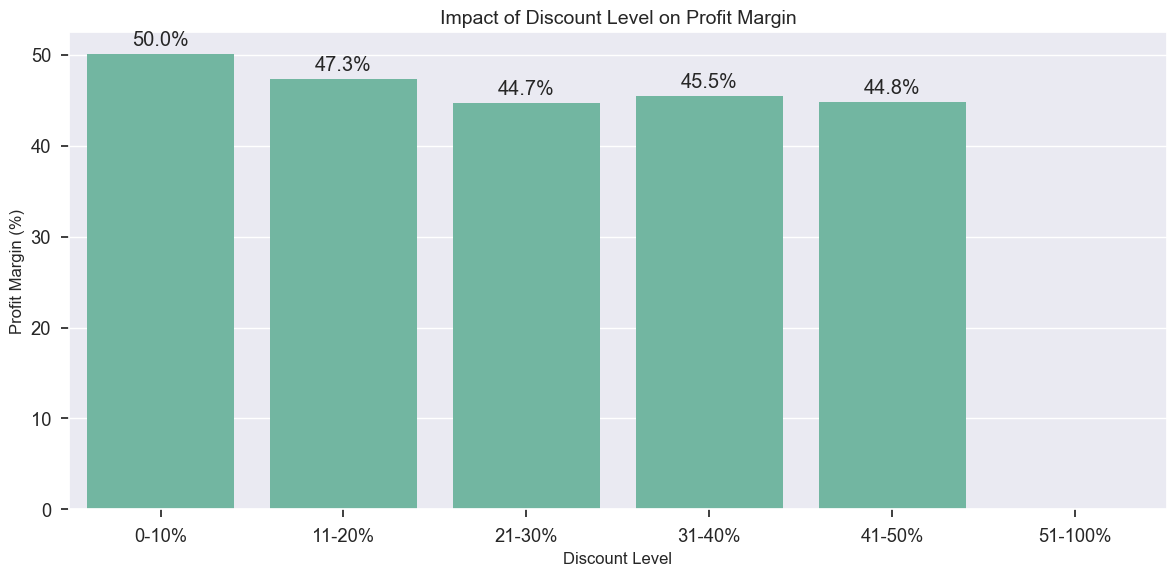

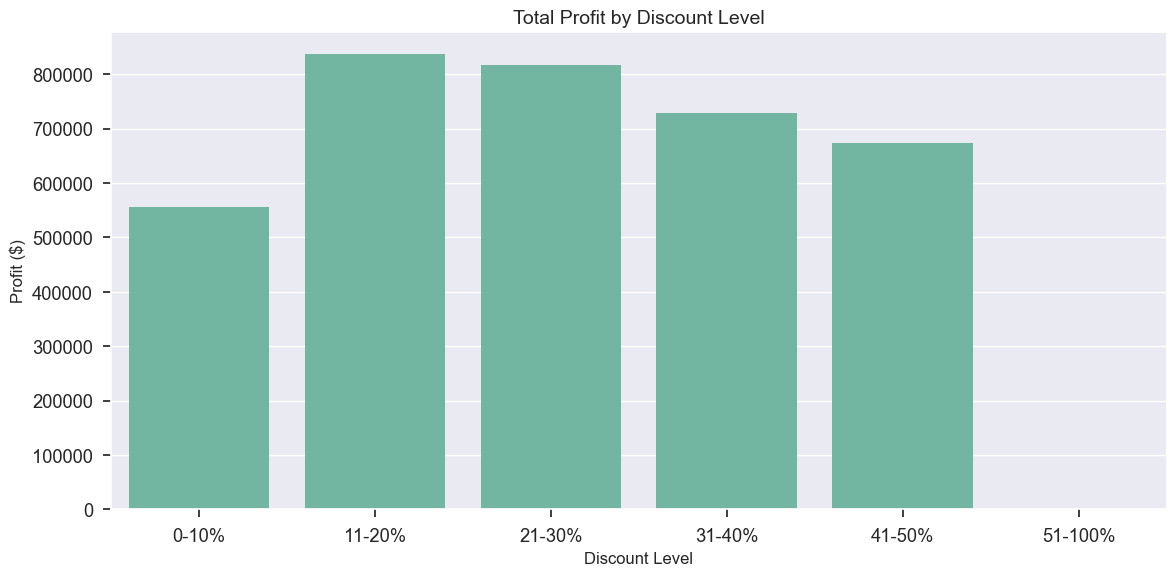

In [82]:
# Discount Analysis

if 'Discount' in df.columns:
    # Create discount bins for analysis
    df['Discount_Bin'] = pd.cut(df['Discount'], 
                              bins=[-0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], 
                              labels=['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-100%'])
    
    # Basic aggregation without Customer_Id
    discount_analysis = df.groupby('Discount_Bin', observed=True).agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Quantity': 'sum'
    })
    
    discount_analysis['Profit_Margin'] = (discount_analysis['Profit'] / discount_analysis['Sales']) * 100
    
    print("\nDiscount Level Analysis:")
    print(discount_analysis)
    
    # Single visualization without annotations to avoid indexing issues
    plt.figure(figsize=(12, 6))
    
    # Create bar plot
    ax = sns.barplot(x=discount_analysis.index, y=discount_analysis['Profit_Margin'])
    
    # Manual annotation that doesn't rely on patches
    for i, idx in enumerate(discount_analysis.index):
        if i < len(discount_analysis):  # Safety check
            value = discount_analysis.loc[idx, 'Profit_Margin']
            plt.text(i, value + 1, f'{value:.1f}%', ha='center')
    
    plt.title('Impact of Discount Level on Profit Margin', fontsize=14)
    plt.xlabel('Discount Level', fontsize=12)
    plt.ylabel('Profit Margin (%)', fontsize=12)
    plt.tight_layout()
    plt.savefig('discount_margin_impact.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Simple profit by discount visualization
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=discount_analysis.index, y=discount_analysis['Profit'])
    
    plt.title('Total Profit by Discount Level', fontsize=14)
    plt.xlabel('Discount Level', fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.tight_layout()
    plt.savefig('discount_profit.png', dpi=300, bbox_inches='tight')
    plt.show()